# CPN009 - Export the enriched petri net to a CPN model

In [93]:
import pm4py

### Step 1: Import an event log (XES format)

In [94]:
from pm4py.objects.log.importer.xes import importer as xes_importer

log = xes_importer.apply("input_data/running-example.xes")

### Step 2: Discover a process model (using Inductive miner)

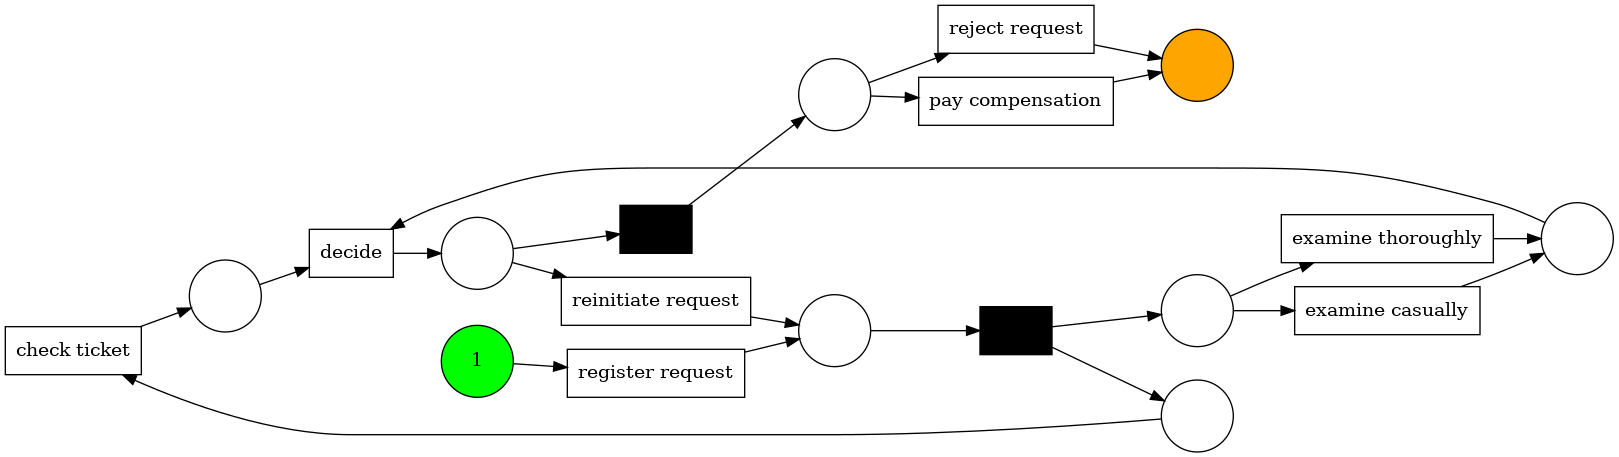

In [95]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.petrinet import visualizer

net, initial_marking, final_marking = inductive_miner.apply(log)
gviz = visualizer.apply(net, initial_marking, final_marking)
visualizer.view(gviz)

### Step 3: Enrich performance information (used existing function in pm4py)

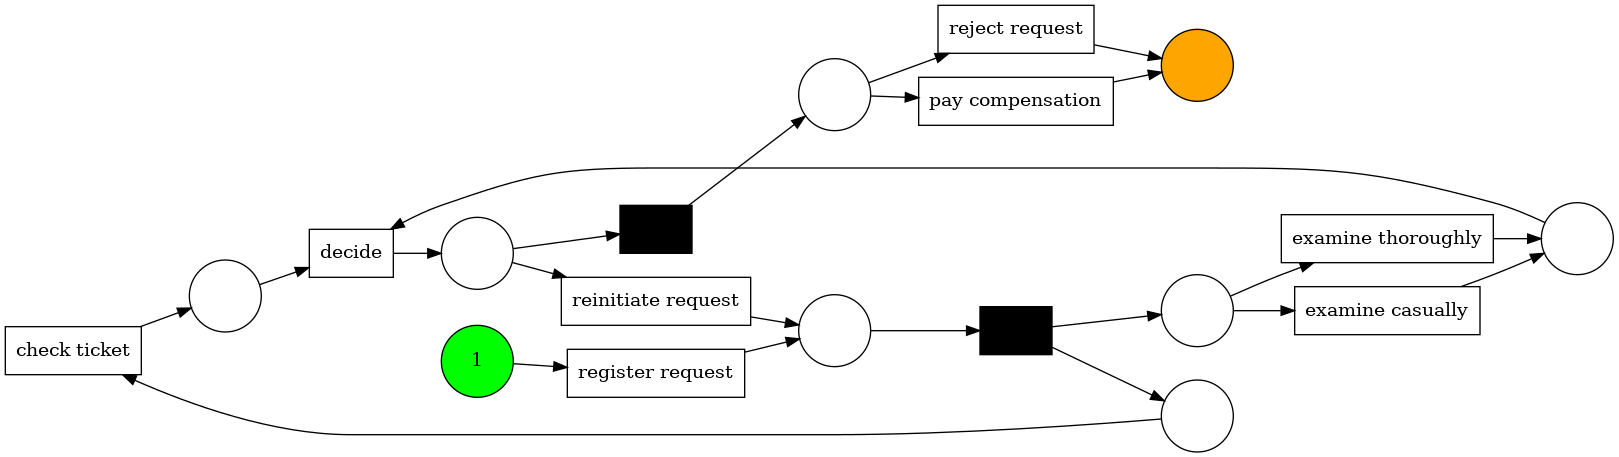

In [96]:
from pm4py.visualization.petrinet import visualizer as pn_visualizer

gviz = pn_visualizer.apply(net, initial_marking, final_marking, log=log)
pn_visualizer.view(gviz)

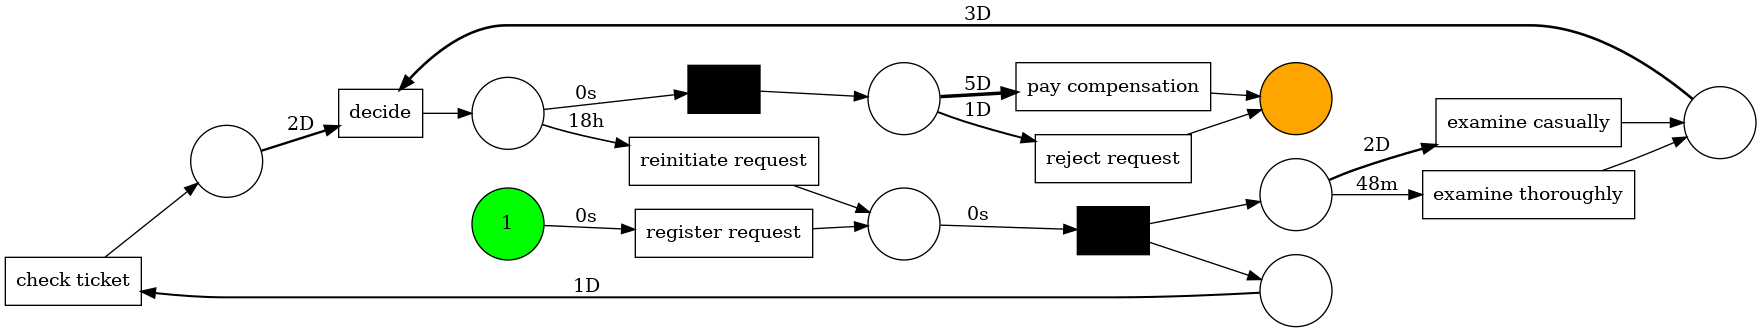

In [97]:
from pm4py.visualization.petrinet import visualizer as pn_visualizer

gviz = pn_visualizer.apply(net, 
                           initial_marking, 
                           final_marking,
                           variant=pn_visualizer.Variants.PERFORMANCE, 
                           log=log)
pn_visualizer.view(gviz)

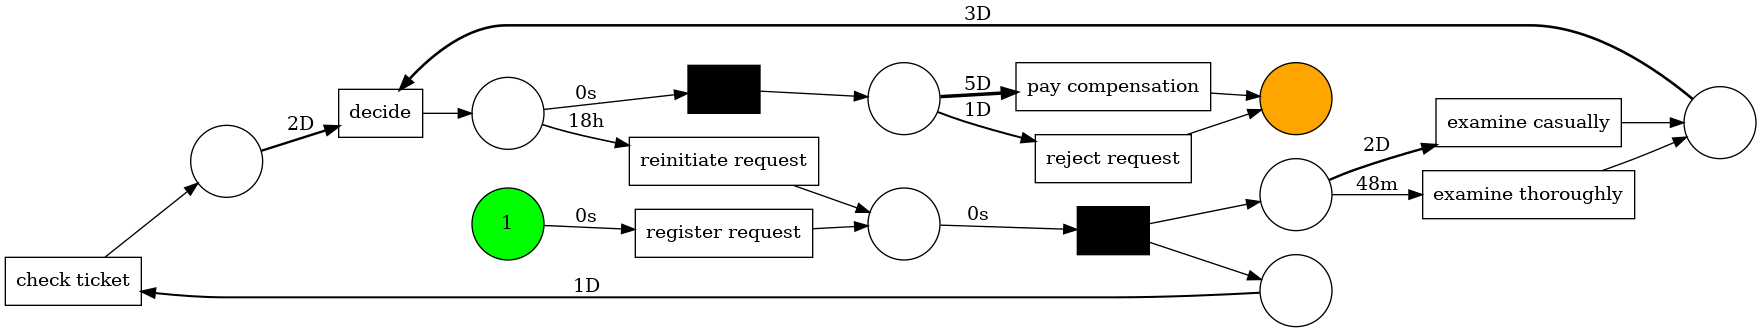

In [98]:
from pm4py.visualization.petrinet import visualizer as pn_visualizer

parameters = { pn_visualizer.Variants.PERFORMANCE.value.Parameters.FORMAT: "png" }
gviz = pn_visualizer.apply(net, initial_marking, final_marking, parameters=parameters, 
                           variant=pn_visualizer.Variants.PERFORMANCE, log=log)
pn_visualizer.save(gviz, "inductive_perf.png")
pn_visualizer.view(gviz)

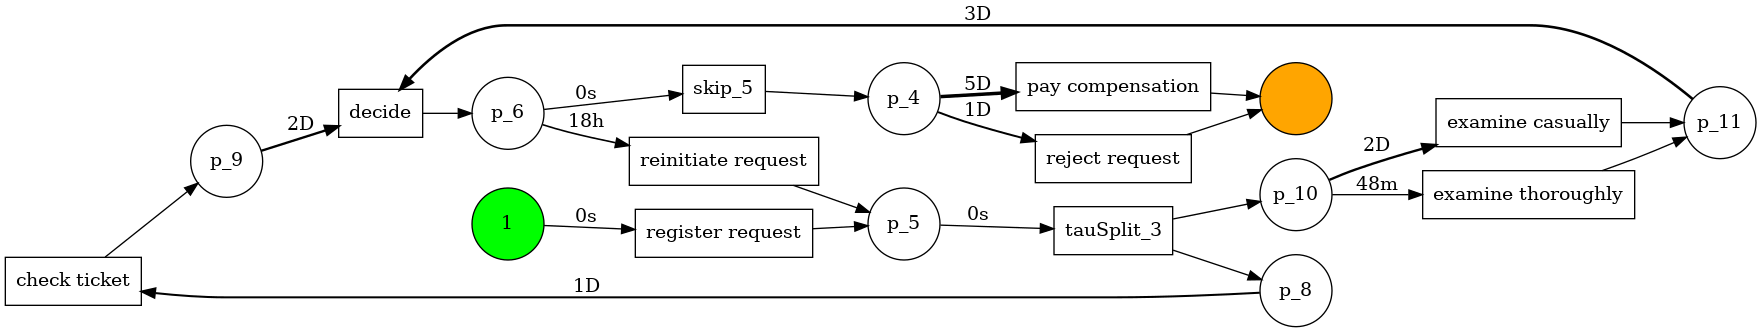

In [99]:
from pm4py.visualization.petrinet import visualizer as pn_visualizer

parameters = { pn_visualizer.Variants.WO_DECORATION.value.Parameters.DEBUG: True }
gviz = pn_visualizer.apply(net, initial_marking, final_marking, parameters=parameters, 
                           variant=pn_visualizer.Variants.PERFORMANCE, log=log)
pn_visualizer.view(gviz)

### Petri net characteristics

In [100]:
# The ellipses and circles are called places. They describe the states of the system.
print("Number of places: ", len(net.places))
print("Places are: ", net.places)

# The arrows are called arcs. 
# The arcexpressions describe how the state of the CP-net changes when the transitions occur.
print("Number of arcs: ", len(net.arcs))
print("Arcs are: ", net.arcs)

# The rectangles are called transitions. They describe the actions.
print("Number of transitions: ", len(net._PetriNet__transitions))
print("Transitions are: ", net._PetriNet__transitions)

Number of places:  9
Places are:  {sink, p_6, p_8, p_5, source, p_9, p_11, p_4, p_10}
Number of arcs:  22
Arcs are:  {(t)reinitiate request->(p)p_5, (p)p_6->(t)skip_5, (p)p_9->(t)decide, (p)p_10->(t)examine thoroughly, (t)check ticket->(p)p_9, (p)p_6->(t)reinitiate request, (p)p_4->(t)reject request, (p)p_10->(t)examine casually, (t)reject request->(p)sink, (p)p_4->(t)pay compensation, (t)skip_5->(p)p_4, (t)pay compensation->(p)sink, (t)register request->(p)p_5, (p)p_5->(t)tauSplit_3, (p)p_11->(t)decide, (p)p_8->(t)check ticket, (t)examine thoroughly->(p)p_11, (t)tauSplit_3->(p)p_10, (t)examine casually->(p)p_11, (t)decide->(p)p_6, (t)tauSplit_3->(p)p_8, (p)source->(t)register request}
Number of transitions:  10
Transitions are:  {check ticket, decide, reinitiate request, register request, examine casually, reject request, skip_5, tauSplit_3, pay compensation, examine thoroughly}


### Export the enriched petri net to a CPN model

In [103]:
from xml.dom.minidom import DOMImplementation
import os  

def create_cpn_model_from_petri_net(petri_net):
    imp = DOMImplementation()
    
    # <!DOCTYPE workspaceElements PUBLIC "-//CPN//DTD CPNXML 1.0//EN" "http://www.daimi.au.dk/~cpntools/bin/DTD/2/cpn.dtd">
    doctype = imp.createDocumentType(
        qualifiedName="workspaceElements",
        publicId="-//CPN//DTD CPNXML 1.0//EN",
        systemId="http://www.daimi.au.dk/~cpntools/bin/DTD/2/cpn.dtd",
    )

    document = imp.createDocument(None, "workspaceElements", doctype)

    workspaceElements = document.getElementsByTagName("workspaceElements")[0]

    # <generator tool="CPN Tools" version="0.1.69.1" format="2"/>
    generator_tag = document.createElement("generator") 
    generator_tag.setAttribute("tool", "CPN Tools") 
    generator_tag.setAttribute("version", "0.1.69.1")
    generator_tag.setAttribute("format", "2")
    workspaceElements.appendChild(generator_tag) 

    # <cpnet>
    cpnet_tag = document.createElement("cpnet")
    workspaceElements.appendChild(cpnet_tag)

    # TODO: <globbox>
    # <globbox>
    globbox_tag = document.createElement("globbox")
    cpnet_tag.appendChild(globbox_tag)

    # <page>
    page_tag = document.createElement("page")
    page_tag.setAttribute("id", "{PLACE_HOLDER}")
    cpnet_tag.appendChild(page_tag)

    # <pageattr name="Page"/>
    pageattr_tag = document.createElement("pageattr")
    pageattr_tag.setAttribute("name", "Page")
    page_tag.appendChild(pageattr_tag)

        # <place>
    for place in petri_net.places:
        place_tag = document.createElement("place")
        place_tag.setAttribute("id", "{PLACE_HOLDER}")
        
        posattr_tag = document.createElement("posattr")
        posattr_tag.setAttribute("x", "{PLACE_HOLDER}")
        posattr_tag.setAttribute("y", "{PLACE_HOLDER}")
        place_tag.appendChild(posattr_tag)
        
        fillattr_tag = document.createElement("fillattr")
        fillattr_tag.setAttribute("colour", "White")
        fillattr_tag.setAttribute("pattern", "Solid")
        fillattr_tag.setAttribute("filled", "false")
        place_tag.appendChild(fillattr_tag)
        
        lineattr_tag = document.createElement("lineattr")
        lineattr_tag.setAttribute("colour", "Black")
        lineattr_tag.setAttribute("thick", "2")
        lineattr_tag.setAttribute("type", "Solid")
        place_tag.appendChild(lineattr_tag)
        
        textattr_tag = document.createElement("textattr")
        textattr_tag.setAttribute("colour", "Black")
        textattr_tag.setAttribute("bold", "false")
        place_tag.appendChild(textattr_tag)
        
        text_tag = document.createElement("text")
        text_tag.appendChild(document.createTextNode(str(place)))
        place_tag.appendChild(text_tag)

        ellipse_tag = document.createElement("ellipse")
        ellipse_tag.setAttribute("w", "{PLACE_HOLDER}")
        ellipse_tag.setAttribute("h", "{PLACE_HOLDER}")
        place_tag.appendChild(ellipse_tag)
        
        token_tag = document.createElement("token")
        token_tag.setAttribute("x", "{PLACE_HOLDER}")
        token_tag.setAttribute("y", "{PLACE_HOLDER}")
        place_tag.appendChild(token_tag)
        
        marking_tag = document.createElement("marking")
        marking_tag.setAttribute("x", "{PLACE_HOLDER}")
        marking_tag.setAttribute("y", "{PLACE_HOLDER}")
        place_tag.appendChild(marking_tag)
        
        # TODO: <type> and <initmark>
        
        page_tag.appendChild(place_tag)

        
    # <trans>
    for trans in petri_net._PetriNet__transitions:
        trans_tag = document.createElement("trans")
        trans_tag.setAttribute("id", "{PLACE_HOLDER}")
        
        posattr_tag = document.createElement("posattr")
        posattr_tag.setAttribute("x", "{PLACE_HOLDER}")
        posattr_tag.setAttribute("y", "{PLACE_HOLDER}")
        trans_tag.appendChild(posattr_tag)
        
        fillattr_tag = document.createElement("fillattr")
        fillattr_tag.setAttribute("colour", "White")
        fillattr_tag.setAttribute("pattern", "Solid")
        fillattr_tag.setAttribute("filled", "false")
        trans_tag.appendChild(fillattr_tag)
        
        lineattr_tag = document.createElement("lineattr")
        lineattr_tag.setAttribute("colour", "Black")
        lineattr_tag.setAttribute("thick", "2")
        lineattr_tag.setAttribute("type", "Solid")
        trans_tag.appendChild(lineattr_tag)
        
        textattr_tag = document.createElement("textattr")
        textattr_tag.setAttribute("colour", "Black")
        textattr_tag.setAttribute("bold", "false")
        trans_tag.appendChild(textattr_tag)
        
        text_tag = document.createElement("text")
        text_tag.appendChild(document.createTextNode(str(trans)))
        trans_tag.appendChild(text_tag)
        
        box_tag = document.createElement("box")
        box_tag.setAttribute("w", "{PLACE_HOLDER}")
        box_tag.setAttribute("h", "{PLACE_HOLDER}")
        trans_tag.appendChild(box_tag)
        
        page_tag.appendChild(trans_tag)
            
        
    # <arcs>
    for arc in petri_net.arcs:
        arc_tag = document.createElement("arc")
        arc_tag.setAttribute("id", "{PLACE_HOLDER}")
        arc_tag.setAttribute("orientation", "{PLACE_HOLDER}")
        
        posattr_tag = document.createElement("posattr")
        posattr_tag.setAttribute("x", "{PLACE_HOLDER}")
        posattr_tag.setAttribute("y", "{PLACE_HOLDER}")
        arc_tag.appendChild(posattr_tag)
        
        fillattr_tag = document.createElement("fillattr")
        fillattr_tag.setAttribute("colour", "White")
        fillattr_tag.setAttribute("pattern", "Solid")
        fillattr_tag.setAttribute("filled", "false")
        arc_tag.appendChild(fillattr_tag)
        
        lineattr_tag = document.createElement("lineattr")
        lineattr_tag.setAttribute("colour", "Black")
        lineattr_tag.setAttribute("thick", "2")
        lineattr_tag.setAttribute("type", "Solid")
        arc_tag.appendChild(lineattr_tag)
        
        textattr_tag = document.createElement("textattr")
        textattr_tag.setAttribute("colour", "Black")
        textattr_tag.setAttribute("bold", "false")
        arc_tag.appendChild(textattr_tag)
        
        arrowattr_tag = document.createElement("arrowattr")
        arrowattr_tag.setAttribute("headsize", "{PLACE_HOLDER}")
        arrowattr_tag.setAttribute("currentcyckle", "{PLACE_HOLDER}")
        arc_tag.appendChild(arrowattr_tag)
        
        transend_tag = document.createElement("transend")
        transend_tag.setAttribute("idref", "{PLACE_HOLDER}")
        arc_tag.appendChild(transend_tag)
        
        placeend_tag = document.createElement("placeend")
        placeend_tag.setAttribute("idref", "{PLACE_HOLDER}")
        arc_tag.appendChild(placeend_tag)
        
        annot_tag = document.createElement("annot")
        annot_tag.setAttribute("id", "{PLACE_HOLDER}")
        
        posattr_tag = document.createElement("posattr")
        posattr_tag.setAttribute("x", "{PLACE_HOLDER}")
        posattr_tag.setAttribute("y", "{PLACE_HOLDER}")
        annot_tag.appendChild(posattr_tag)
        
        fillattr_tag = document.createElement("fillattr")
        fillattr_tag.setAttribute("colour", "White")
        fillattr_tag.setAttribute("pattern", "Solid")
        fillattr_tag.setAttribute("filled", "false")
        annot_tag.appendChild(fillattr_tag)
        
        lineattr_tag = document.createElement("lineattr")
        lineattr_tag.setAttribute("colour", "Black")
        lineattr_tag.setAttribute("thick", "0")
        lineattr_tag.setAttribute("type", "Solid")
        annot_tag.appendChild(lineattr_tag)
        
        textattr_tag = document.createElement("textattr")
        textattr_tag.setAttribute("colour", "Black")
        textattr_tag.setAttribute("bold", "false")
        annot_tag.appendChild(textattr_tag)
        
        text_tag = document.createElement("text")
        text_tag.appendChild(document.createTextNode(str("{PLACE_HOLDER}")))
        annot_tag.appendChild(text_tag)
        
        arc_tag.appendChild(annot_tag)
        
        page_tag.appendChild(arc_tag)
    
    
    return document    

# export xml as cpn file  
def save_cpn_model(model, filepath):
    # <?xml version="1.0" encoding="iso-8859-1"?>
    xml_str = model.toprettyxml(encoding="iso-8859-1")  
    with open(filepath, "wb") as file: 
        file.write(xml_str)

In [104]:
cpn_model = create_cpn_model_from_petri_net(net)

save_cpn_model(cpn_model, "./test.cpn")